## 2024T2 COMP9414 Assignment1




### Xuan Wang
### z5442066



### Note: Please go to the third part to output and evaluate the test set results.

# 0 View and analyze data

The following code is used to draw the histogram and QQ plot of each feature to check whether it is normally distributed. It can be seen that some features do not obey the normal distribution, so normalization is used when performing feature engineering. In addition, looking at the number of missing values ​in each column, it can be seen that the NMHC (GT) column has 7525 missing values, and the entire sample has only 8358 data, so it is not very meaningful for reference. This feature is directly excluded in both tasks.

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('AirQualityUCI _ Students.xlsx')

print("Number of samples: ", len(data), '\n')
print(data.head())

# Print the number of Nan values ​​in each column
for column in data.columns[2:]:
    # Find all samples with a value of -200
    indices = data.index[data[column] == -200].tolist()
    if indices:
        print(f'In column "{column}", the number of NaN value is {len(indices)}')


Number of samples:  8358 

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.72

Skipping Date because it is not a numeric type.
Skipping Time because it is not a numeric type.


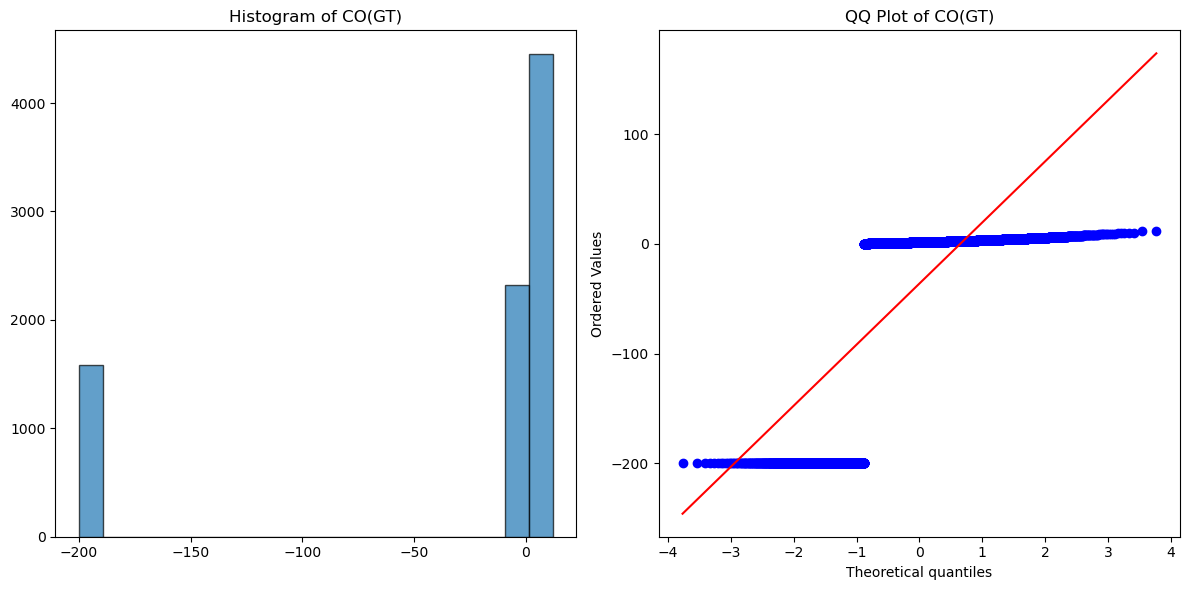

Shapiro-Wilk Test for CO(GT): statistic=0.4936339855194092, pvalue=0.0


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


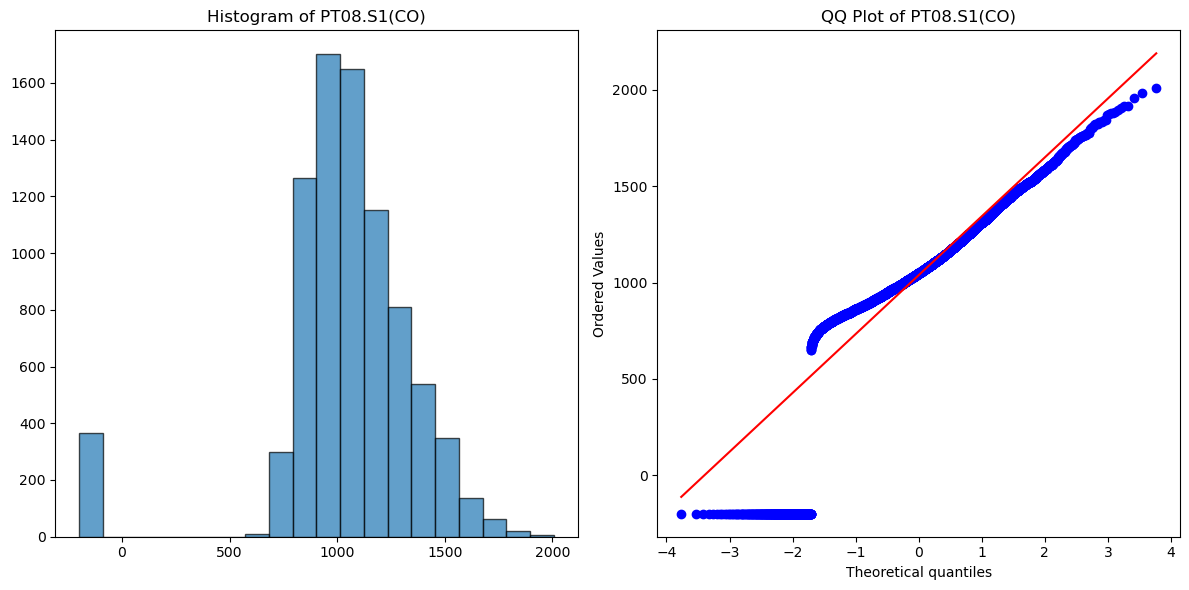

Shapiro-Wilk Test for PT08.S1(CO): statistic=0.81570965051651, pvalue=0.0


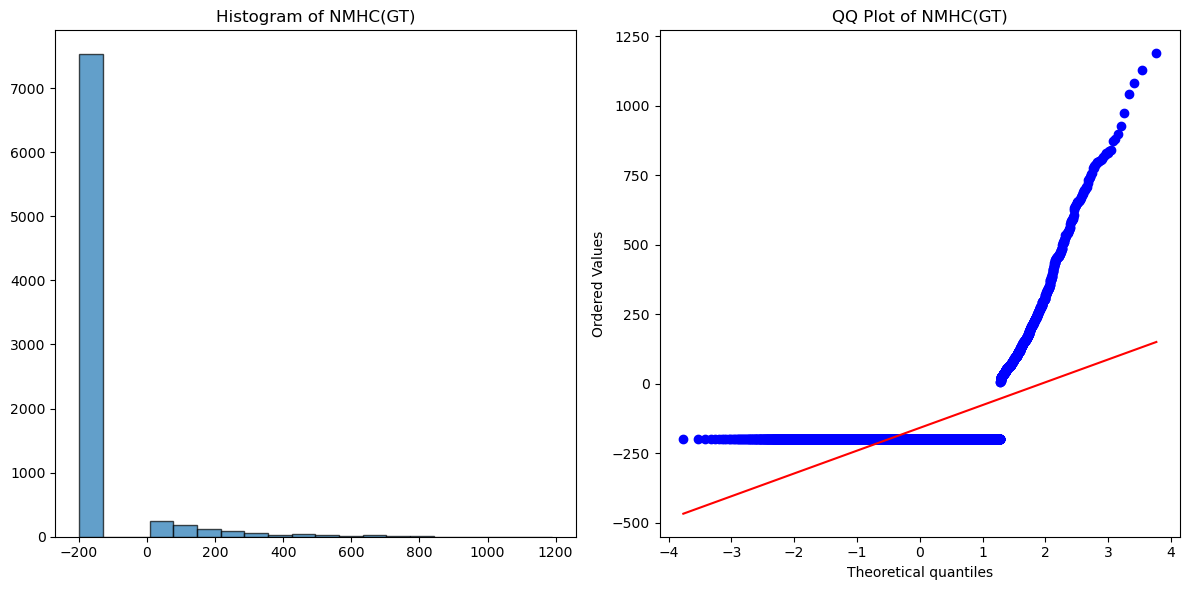

Shapiro-Wilk Test for NMHC(GT): statistic=0.33394378423690796, pvalue=0.0


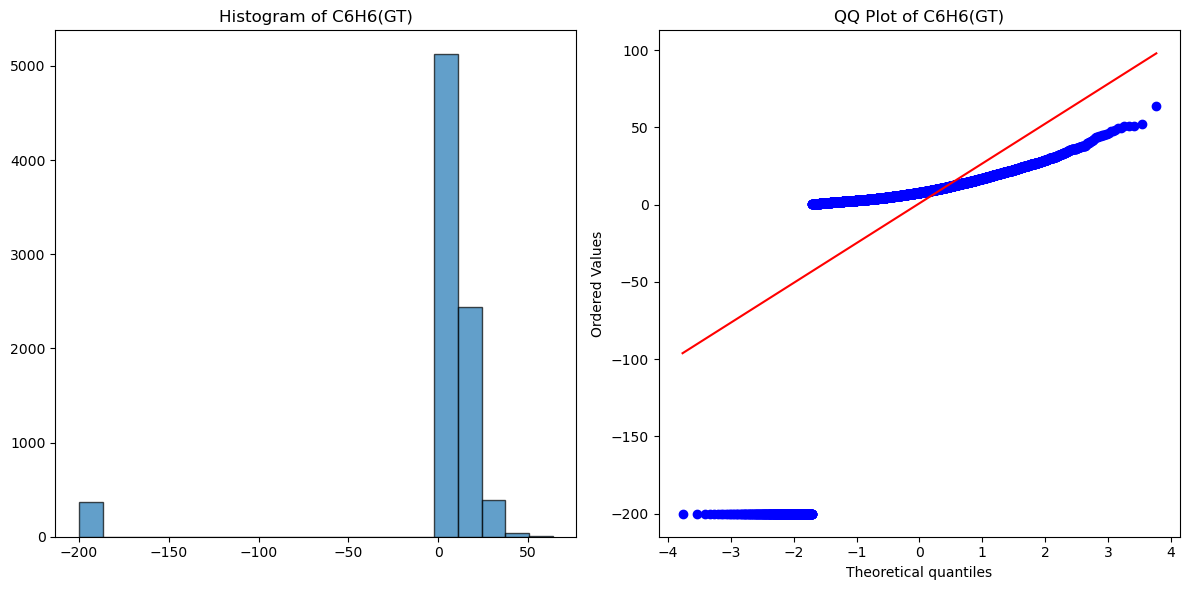

Shapiro-Wilk Test for C6H6(GT): statistic=0.34890061616897583, pvalue=0.0


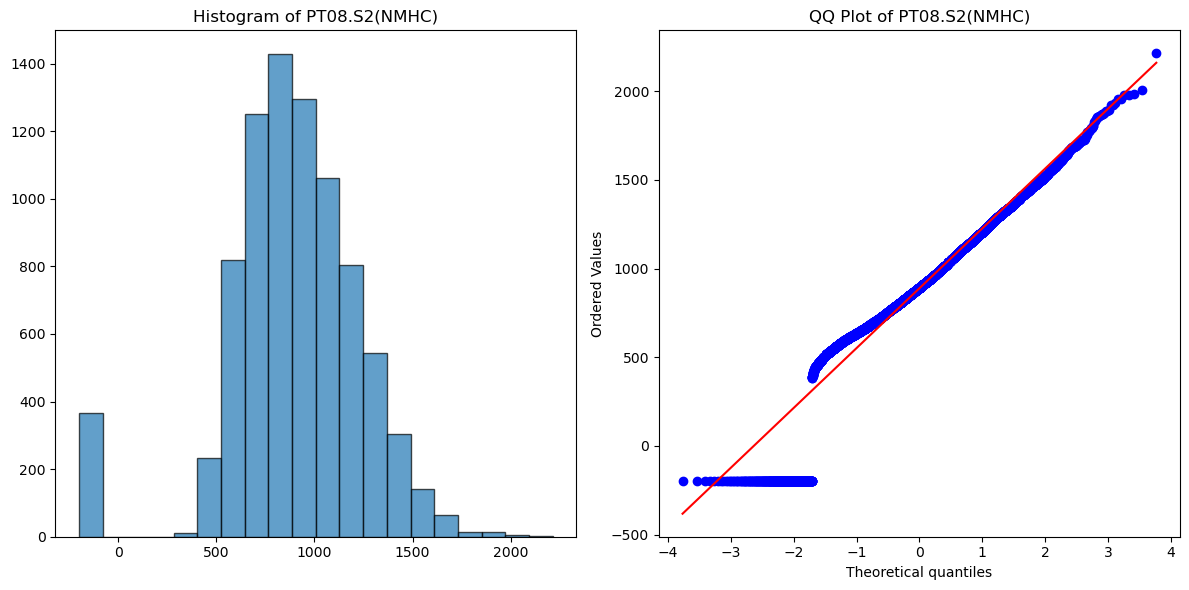

Shapiro-Wilk Test for PT08.S2(NMHC): statistic=0.927415132522583, pvalue=0.0


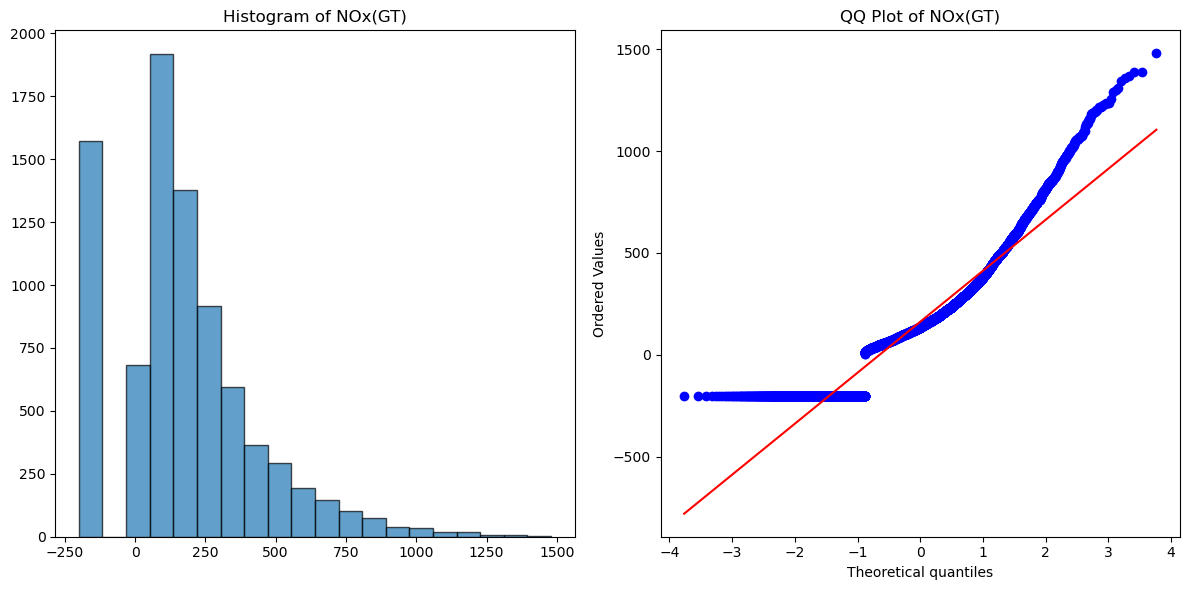

Shapiro-Wilk Test for NOx(GT): statistic=0.9220476746559143, pvalue=0.0


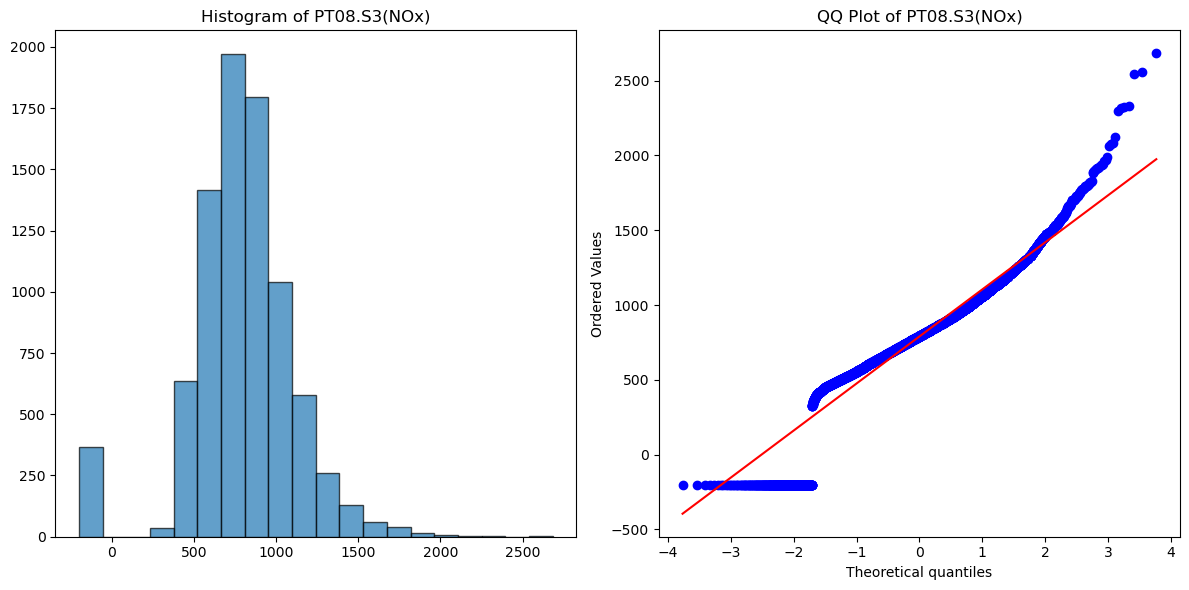

Shapiro-Wilk Test for PT08.S3(NOx): statistic=0.922149658203125, pvalue=0.0


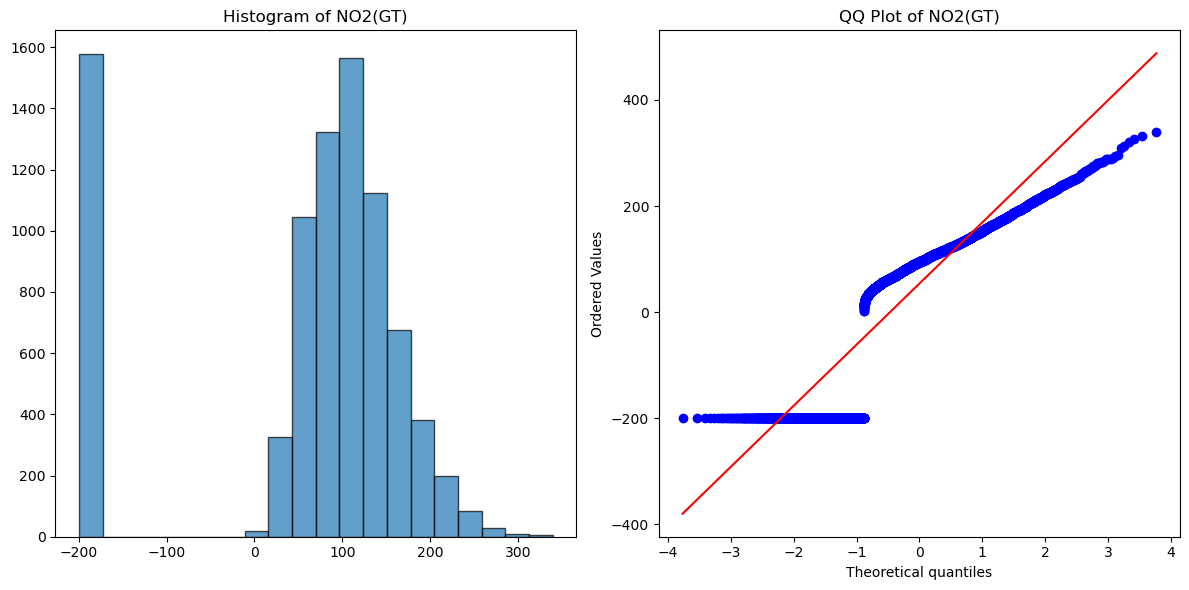

Shapiro-Wilk Test for NO2(GT): statistic=0.7833272814750671, pvalue=0.0


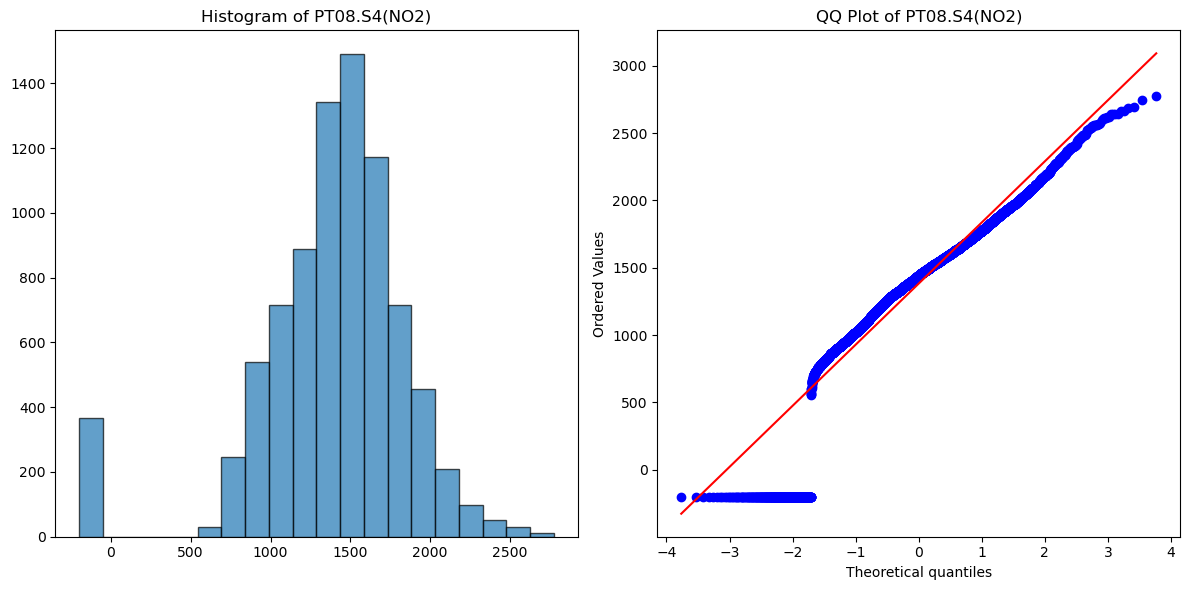

Shapiro-Wilk Test for PT08.S4(NO2): statistic=0.8968047499656677, pvalue=0.0


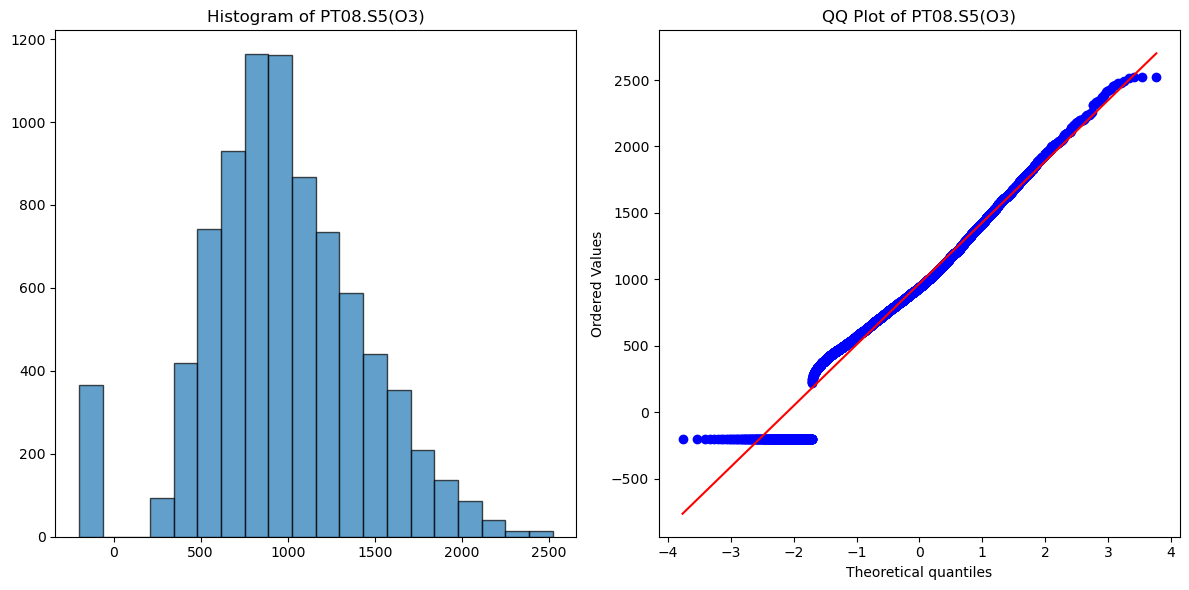

Shapiro-Wilk Test for PT08.S5(O3): statistic=0.9786878228187561, pvalue=1.5449046544987226e-33


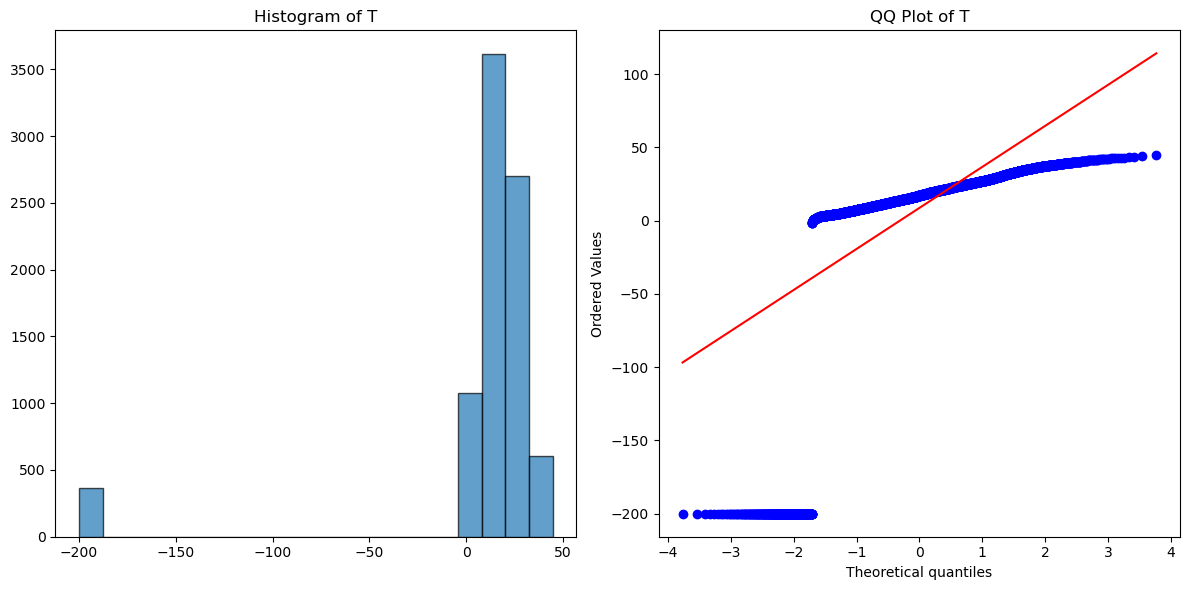

Shapiro-Wilk Test for T: statistic=0.3785228729248047, pvalue=0.0


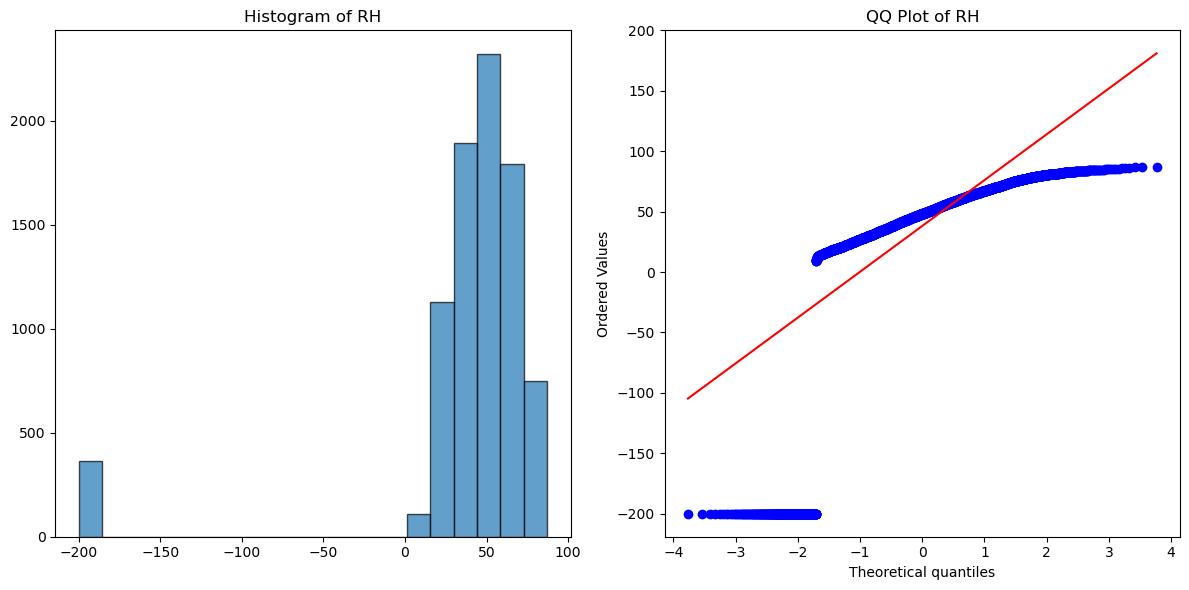

Shapiro-Wilk Test for RH: statistic=0.4991036057472229, pvalue=0.0


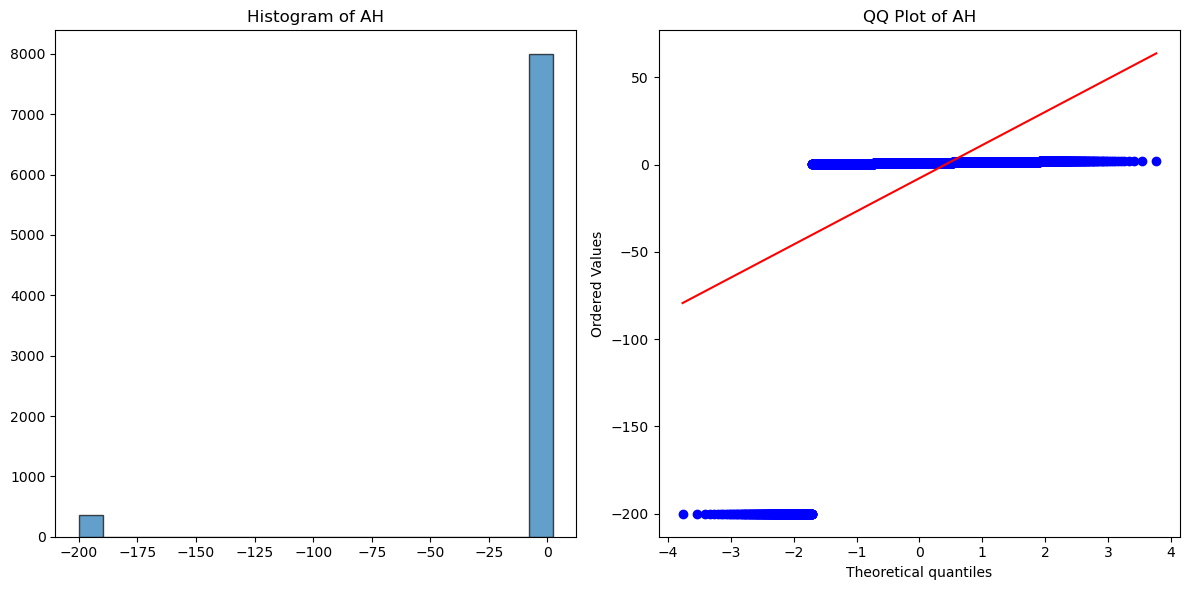

Shapiro-Wilk Test for AH: statistic=0.21311503648757935, pvalue=0.0


In [7]:
# Draw histograms and QQ plots for each feature
for feature in data.columns:
    # Exclude non-numeric columns
    if pd.api.types.is_numeric_dtype(data[feature]):
        feature_data = data[feature].dropna()

        # Skip if the data is completely missing or too little
        if feature_data.empty or len(feature_data) < 10:
            print(f"Skipping {feature} due to insufficient data.")
            continue

        # show the plots
        plt.figure(figsize=(12, 6))

        plt.subplot(121)
        plt.hist(feature_data, bins=20, edgecolor='k', alpha=0.7)
        plt.title(f'Histogram of {feature}')

        plt.subplot(122)
        stats.probplot(feature_data, dist="norm", plot=plt)
        plt.title(f'QQ Plot of {feature}')

        plt.tight_layout()
        plt.show()

        shapiro_test = stats.shapiro(feature_data)
        print(f"Shapiro-Wilk Test for {feature}: statistic={shapiro_test.statistic}, pvalue={shapiro_test.pvalue}")
    else:
        print(f"Skipping {feature} because it is not a numeric type.")


# 1 Classfication Task

## 1.1 Caculate the mean of CO(GT) and generate labels

The original data set has not been processed in any way, so when performing the classification task, we first need to find the label. By calculating the mean of CO(GT) to get a threshold, we use this threshold to label each sample.

In [10]:
print("Original data size is: ",data.shape)

# Replace all -200 values ​​with NaN
data.replace(-200, np.nan, inplace=True)

# Calculate the mean of CO(GT), automatically ignoring NaN values
co_gt_mean = data['CO(GT)'].mean()
print("The mean of CO(GT) is: ", co_gt_mean)

# Delete the samples with CO(GT) is NaN value
data = data.dropna(subset=['CO(GT)'])
print("After deleting samples with NaN values ​​for CO(GT), the data size is: ",data.shape)

# Create a new categorical column based on the mean
data['CO(GT)_Category'] = (data['CO(GT)'] >= co_gt_mean).astype(int)
print("After creating the categorical column, the data size is: ：",data.shape)
print(data.head())

Original data size is:  (8358, 15)
The mean of CO(GT) is:  2.146951129484719
After deleting samples with NaN values ​​for CO(GT), the data size is:  (6773, 15)
After creating the categorical column, the data size is: ： (6773, 16)
        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00     150.0  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25     112.0   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00      88.0   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50      80.0   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25      51.0   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    12

In [11]:
# Count the number of 1 and 0 in the CO(GT)_Category column
category_counts = data['CO(GT)_Category'].value_counts()

print("Counts of each category in CO(GT)_Category: ")
print(category_counts)


Counts of each category in CO(GT)_Category: 
CO(GT)_Category
0    4029
1    2744
Name: count, dtype: int64


## 1.2 Handle missing value

We have previously observed that the NMHC(GT) column has too many NaN values, so we delete this column directly. For the NaN values ​​of the remaining columns, we can observe that some NaN values ​​appear sporadically, but some are missing continuously. Since it is time series data, the data is highly correlated with time. The strategy here is to interpolate and fill the part with no more than 5 consecutive NaN values, and use polynomial interpolation to fill those longer gaps, which can reduce data errors.

In [13]:
# Count the number of NaN values ​​in each column
nan_counts = data.isna().sum()

# Calculate 20% of the total number of samples
threshold = len(data) * 0.20

# Find and delete columns with more than 20% NaN values
columns_to_drop = nan_counts[nan_counts > threshold].index.tolist()
data.drop(columns=columns_to_drop, inplace=True)

print(f"The data shape after deleting the column with more than 20% NaN values: ", data.shape)

The data shape after deleting the column with more than 20% NaN values:  (6773, 15)


In [14]:
for column in data.columns:
    # Get the NaN index of the current column
    nan_indices = data[data[column].isna()].index

    if len(nan_indices) == 0:
        continue  # If there are no NaN values, skip the current column

    # Find consecutive NaN indices
    groups = []
    group = [nan_indices[0]]

    for i in range(1, len(nan_indices)):
        if nan_indices[i] == nan_indices[i - 1] + 1:
            group.append(nan_indices[i])
        else:
            groups.append(group)
            group = [nan_indices[i]]

    # Add the last group
    groups.append(group)

    # Apply different fill strategies based on the size of the group
    for group in groups:
        if len(group) <= 5:
            # Fill less than or equal to 5 consecutive NaNs with linear interpolation
            data[column].interpolate(method='linear', inplace=True, limit_direction='both', limit_area='inside')
        else:
            # Use polynomial interpolation to fill more than 5 consecutive NaNs
            data.loc[group[0]:group[-1], column] = data[column].interpolate(method='polynomial', order=3, limit_direction='both')


## 1.3 Feature Engineering

For time series data, time is also a feature that we need to focus on, so we process the date and time into a format that can be used as two of the features. In addition, we select the columns except CO(GT) as the feature set, and the CO(GT)_Category column as the label set. Then normalize all the features. Since our task is to classify CO(GT), PT08.S1(CO) is the most highly correlated feature among all the features. After normalization, we multiply the column value by two to increase the weight of this feature.

In [16]:
# Format date columns, removing the time portion
data['Date'] = pd.to_datetime(data['Date']).dt.strftime('%Y/%m/%d')

# Convert a date to the number of days since 3/10/2004
data['Date'] = (pd.to_datetime(data['Date']) - pd.Timestamp('2004-03-10')).dt.days

# Convert time to integer
data['Time'] = data['Time'].apply(lambda x: x.hour)

# Save a copy for classification
data_for_classification = data.copy()

print(data_for_classification.head())

   Date  Time  CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     0    18     2.6      1360.00  11.881723        1045.50    166.0   
1     0    19     2.0      1292.25   9.397165         954.75    103.0   
2     0    20     2.2      1402.00   8.997817         939.25    131.0   
3     0    21     2.2      1375.50   9.228796         948.25    172.0   
4     0    22     1.6      1272.25   6.518224         835.50    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)      T         RH  \
0       1056.25    113.0       1692.00      1267.50  13.60  48.875001   
1       1173.75     92.0       1558.75       972.25  13.30  47.700000   
2       1140.00    114.0       1554.50      1074.00  11.90  53.975000   
3       1092.00    122.0       1583.75      1203.25  11.00  60.000000   
4       1205.00    116.0       1490.00      1110.00  11.15  59.575001   

         AH  CO(GT)_Category  
0  0.757754                1  
1  0.725487                0  
2  0.750239                1 

In [17]:
# Select features: 13 in total
feature_columns = ['Date', 'Time', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'NOx(GT)']

# Extract feature set: X_for_classification
X_for_classification = data_for_classification[feature_columns]

# Extract target column: y_for_classification
y_for_classification = data_for_classification['CO(GT)_Category']

# check the size of these two sets
print("Shape of X_for_classification:", X_for_classification.shape)
print("Shape of y_for_classification:", y_for_classification.shape)

print(X_for_classification.head(10))
print(y_for_classification.head(10))

Shape of X_for_classification: (6773, 13)
Shape of y_for_classification: (6773,)
   Date  Time  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  NO2(GT)  \
0     0    18      1360.00  11.881723        1045.50       1056.25    113.0   
1     0    19      1292.25   9.397165         954.75       1173.75     92.0   
2     0    20      1402.00   8.997817         939.25       1140.00    114.0   
3     0    21      1375.50   9.228796         948.25       1092.00    122.0   
4     0    22      1272.25   6.518224         835.50       1205.00    116.0   
5     0    23      1197.00   4.741012         750.25       1336.50     96.0   
6     1     0      1185.00   3.624399         689.50       1461.75     77.0   
7     1     1      1136.25   3.326677         672.00       1453.25     76.0   
8     1     2      1094.00   2.339416         608.50       1579.00     60.0   
9     1     3      1009.75   1.696658         560.75       1705.00     44.0   

   PT08.S4(NO2)  PT08.S5(O3)       T         RH  

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Train the normalizer and transform the data
X_normalized = scaler.fit_transform(X_for_classification)

# Convert the normalized data back to DataFrame
X_for_classification_normalized = pd.DataFrame(X_normalized, columns=X_for_classification.columns)

# Check the normalized data
print(X_for_classification_normalized.head(10))

       Date      Time  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0  0.000000  0.782609     0.523888  0.184294       0.360514      0.311024   
1  0.000000  0.826087     0.474090  0.145214       0.310850      0.360796   
2  0.000000  0.869565     0.554759  0.138933       0.302367      0.346500   
3  0.000000  0.913043     0.535281  0.142566       0.307292      0.326168   
4  0.000000  0.956522     0.459390  0.099931       0.245588      0.374034   
5  0.000000  1.000000     0.404079  0.071977       0.198933      0.429736   
6  0.002584  0.000000     0.395259  0.054414       0.165686      0.482791   
7  0.002584  0.043478     0.359427  0.049731       0.156109      0.479191   
8  0.002584  0.086957     0.328372  0.034202       0.121357      0.532458   
9  0.002584  0.130435     0.266446  0.024092       0.095225      0.585831   

    NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH   NOx(GT)  
0  0.328694      0.513040     0.454654  0.333333  0.509628  0.287117  0

In [19]:
# Increase the weight of PT08.S1(CO)
X_for_classification_normalized['PT08.S1(CO)'] *= 2

print(X_for_classification_normalized.head(10))

       Date      Time  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0  0.000000  0.782609     1.047777  0.184294       0.360514      0.311024   
1  0.000000  0.826087     0.948181  0.145214       0.310850      0.360796   
2  0.000000  0.869565     1.109519  0.138933       0.302367      0.346500   
3  0.000000  0.913043     1.070562  0.142566       0.307292      0.326168   
4  0.000000  0.956522     0.918780  0.099931       0.245588      0.374034   
5  0.000000  1.000000     0.808159  0.071977       0.198933      0.429736   
6  0.002584  0.000000     0.790518  0.054414       0.165686      0.482791   
7  0.002584  0.043478     0.718853  0.049731       0.156109      0.479191   
8  0.002584  0.086957     0.656744  0.034202       0.121357      0.532458   
9  0.002584  0.130435     0.532892  0.024092       0.095225      0.585831   

    NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH   NOx(GT)  
0  0.328694      0.513040     0.454654  0.333333  0.509628  0.287117  0

## 1.4 Split the dataset and build a neural network

Since it is time series data, randomly dividing the data set is not suitable for this task. We slice the data set in order according to the ratio of 80%. When building a neural network, since the training set size is 5418, the parameters of the neural network cannot exceed 541. Therefore, four hidden layers and one output layer are set. The number of neurons in each layer is 18, 10, 5, 2, and 1, and the total parameters are 512. In addition, in order to ensure the accuracy performance, I customized the loss function to increase the penalty for false positives. Using Adam as the optimizer, the batch size is set to 32, the learning rate is 0.0001, and the iteration is 100 times. In order to prevent overfitting, the dropout technology is added to randomly discard neurons.

In [21]:
from sklearn.model_selection import train_test_split

# Calculate the split points for the training and validation sets
split_point = int(len(X_for_classification_normalized) * 0.8)

# Split the dataset
X_train = X_for_classification_normalized.iloc[:split_point]
X_val = X_for_classification_normalized.iloc[split_point:]
y_train = y_for_classification.iloc[:split_point]
y_val = y_for_classification.iloc[split_point:]

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)


(5418, 13)
(1355, 13)
(5418,)
(1355,)


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


# Construct model: four hidden layers, one output layer
# The number of neurons in each layer is 18, 10, 5, 2, 1 respectively, and the total parameters are 512
model_classification = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input shape
    Dense(18, activation='relu'),  # The first hidden layer
    Dropout(0.5),
    Dense(10, activation='relu'),  # The second hidden layer
    Dropout(0.5),
    Dense(5, activation='relu'),  # The third hidden layer
    Dense(2, activation='relu'),  # The fourth hidden layer
    Dense(1, activation='sigmoid')  # Output Layer
])

# Loss function: Binary cross entropy loss with added weights
def weighted_binary_crossentropy(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    # set the weights
    weights = (y_true * 1) + ((1 - y_true) * 1.3)  # Increase the penalty for false positives
    bce = tf.keras.backend.binary_crossentropy(y_true, y_pred)
    weighted_bce = weights * bce
    return tf.keras.backend.mean(weighted_bce)


# Compile the model
model_classification.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=weighted_binary_crossentropy,
              metrics=['accuracy', Precision()])

# Model Overview
model_classification.summary()

# Train the model
history = model_classification.fit(
    X_train, y_train,
    epochs=100,  # Number of training
    batch_size=32,  # batch_size
    validation_data=(X_val, y_val),
    verbose=1)

# Evaluate the Model
loss, accuracy, precision = model_classification.evaluate(X_val, y_val)
print("Test Loss:",loss)
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 18)             │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 512 (2.00 KB)

 Trainable params: 512 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.5346 - loss: 0.8091 - precision: 0.4242 - val_accuracy: 0.6576 - val_loss: 0.8187 - val_precision: 0.0000e+00
Epoch 2/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.5749 - loss: 0.8018 - precision: 0.5007 - val_accuracy: 0.6576 - val_loss: 0.8040 - val_precision: 0.0000e+00
Epoch 3/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.5820 - loss: 0.7969 - precision: 0.6625 - val_accuracy: 0.6576 - val_loss: 0.7876 - val_precision: 0.0000e+00
Epoch 4/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.5871 - loss: 0.7883 - precision: 0.8134 - val_accuracy: 0.6576 - val_loss: 0.7684 - val_precision: 0.0000e+00
Epoch 5/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.6028 - loss: 0.7775 - precision: 0.8480 - val_accuracy: 0.6576 - val_loss: 0.7519 - val_precision: 0.0000e+00
Epoch 6/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.5710 - loss: 0.7703 - precision: 0.9

## 1.5 Plot the results and save the model

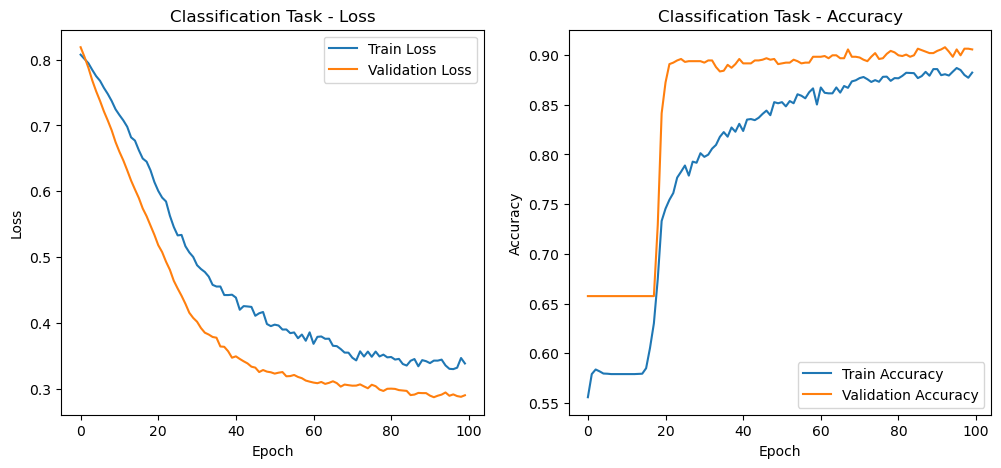

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
True Negatives (TN): 816
False Positives (FP): 75
False Negatives (FN): 53
True Positives (TP): 411
Confusion matrix for the test data for the classification task:
                         Positive (Actual)  Negative (Actual)
0  Positive (Predicted)                411                 75
1  Negative (Predicted)                 53                816
Accuracy and precision for the test data for the classification task:
Classification Accuracy Precision  Number of Samples
        CO(GT)   90.55%    84.57%               1355


In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

# Plot the loss value
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Classification Task - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Classification Task - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# Predict validation set
y_pred_probs = model_classification.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype(int)  # use 0.5 as threhold

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Ravel the elements of the confusion matrix
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Reconstruct confusion matrix table
cm_table = {
    ' ': ['Positive (Predicted)', 'Negative (Predicted)'],
    'Positive (Actual)': [tp, fn],
    'Negative (Actual)': [fp, tn]
}

df = pd.DataFrame(cm_table)

print("Confusion matrix for the test data for the classification task:")
print(df)


# Print accuracy and precision
results_table = {
    'Classification': ['CO(GT)'],
    'Accuracy': [f"{accuracy * 100:.2f}%"],
    'Precision': [f"{precision * 100:.2f}%"],
    'Number of Samples': [len(y_val)]
}

results_df = pd.DataFrame(results_table)

print("Accuracy and precision for the test data for the classification task:")
print(results_df.to_string(index=False))


In [25]:
# Save the model in Keras native format
model_classification.save('model_classification.keras')

# 2 Regression Task

## 2.1 Handle missing value

When performing regression tasks, we do not need to generate additional labels, so we directly handle NaN values ​​first. Similar to the previous operation, we fill the missing values ​​of the remaining columns with two different types ofinterpolation.

In [28]:
# Load the dataset
data = pd.read_excel('AirQualityUCI _ Students.xlsx')
print("The shape of data: ",data.shape)
# Replace all -200 values ​​with NaN
data.replace(-200, np.nan, inplace=True)


The shape of data:  (8358, 15)


In [29]:
# Delete all samples with NaN values ​​in the 'NOx(GT)' column
data = data.dropna(subset=['NOx(GT)'])

# Print the new data size to verify that the rows have been deleted
print("The data shape after deleting: ", data.shape)


The data shape after deleting:  (6785, 15)


In [30]:
# Count the number of NaN values ​​in each column
nan_counts = data.isna().sum()

# Calculate 20% of the total number of samples
threshold = len(data) * 0.20

# Find and delete columns with more than 20% NaN values
columns_to_drop = nan_counts[nan_counts > threshold].index.tolist()
data.drop(columns=columns_to_drop, inplace=True)

print(f"The data shape after deleting {columns_to_drop} : ", data.shape)

The data shape after deleting ['NMHC(GT)'] :  (6785, 14)


In [31]:
for column in data.columns:
    # Get the NaN index of the current column
    nan_indices = data[data[column].isna()].index

    if len(nan_indices) == 0:
        continue  # If there are no NaN values, skip the current column

    # Find consecutive NaN indices
    groups = []
    group = [nan_indices[0]]

    for i in range(1, len(nan_indices)):
        if nan_indices[i] == nan_indices[i - 1] + 1:
            group.append(nan_indices[i])
        else:
            groups.append(group)
            group = [nan_indices[i]]

    # Add the last group
    groups.append(group)

    # Apply different fill strategies based on the size of the group
    for group in groups:
        if len(group) <= 5:
            # Fill less than or equal to 5 consecutive NaNs with linear interpolation
            data[column].interpolate(method='linear', inplace=True, limit_direction='both', limit_area='inside')
        else:
            # Use polynomial interpolation to fill more than 5 consecutive NaNs
            data.loc[group[0]:group[-1], column] = data[column].interpolate(method='polynomial', order=3, limit_direction='both')


## 2.2 Feature Engineering

Here we also transform the date and time columns, then select the columns except NOx(GT) as the feature set, and the NOx(GT) column as the target. Then we normalize the feature set. Because we want to predict NOx(GT), PT08.S3(NOx) is highly correlated with it, so after normalization, we manually multiply the column value by two to increase the weight.

In [33]:
# Format date columns, removing the time portion
data['Date'] = pd.to_datetime(data['Date']).dt.strftime('%Y/%m/%d')

# Convert a date to the number of days since 3/10/2004
data['Date'] = (pd.to_datetime(data['Date']) - pd.Timestamp('2004-03-10')).dt.days

# Convert time to integer
data['Time'] = data['Time'].apply(lambda x: x.hour)

# Save a copy for  regression
data_for_regression = data.copy()

print(data_for_regression.head(10))

    Date  Time  CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0      0    18     2.6      1360.00  11.881723        1045.50    166.0   
1      0    19     2.0      1292.25   9.397165         954.75    103.0   
2      0    20     2.2      1402.00   8.997817         939.25    131.0   
3      0    21     2.2      1375.50   9.228796         948.25    172.0   
4      0    22     1.6      1272.25   6.518224         835.50    131.0   
5      0    23     1.2      1197.00   4.741012         750.25     89.0   
6      1     0     1.2      1185.00   3.624399         689.50     62.0   
7      1     1     1.0      1136.25   3.326677         672.00     62.0   
8      1     2     0.9      1094.00   2.339416         608.50     45.0   
10     1     4     0.8      1011.00   1.293620         526.75     21.0   

    PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T         RH  \
0        1056.25    113.0       1692.00      1267.50  13.600  48.875001   
1        1173.75     92.0       155

In [34]:
# Select features: 13 in total
feature_columns = ['Date', 'Time', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'CO(GT)']

# # Extract feature set: X_for_regression
X_for_regression = data[feature_columns]

# Extract target column: y_for_regression
y_for_regression = data['NOx(GT)']

# check the size of these two sets
print("Shape of X_for_regression:", X_for_regression.shape)
print("Shape of y_for_regression:", y_for_regression.shape)

print(X_for_regression.head(10))
print(y_for_regression.head())

Shape of X_for_regression: (6785, 13)
Shape of y_for_regression: (6785,)
    Date  Time  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  NO2(GT)  \
0      0    18      1360.00  11.881723        1045.50       1056.25    113.0   
1      0    19      1292.25   9.397165         954.75       1173.75     92.0   
2      0    20      1402.00   8.997817         939.25       1140.00    114.0   
3      0    21      1375.50   9.228796         948.25       1092.00    122.0   
4      0    22      1272.25   6.518224         835.50       1205.00    116.0   
5      0    23      1197.00   4.741012         750.25       1336.50     96.0   
6      1     0      1185.00   3.624399         689.50       1461.75     77.0   
7      1     1      1136.25   3.326677         672.00       1453.25     76.0   
8      1     2      1094.00   2.339416         608.50       1579.00     60.0   
10     1     4      1011.00   1.293620         526.75       1817.50     34.0   

    PT08.S4(NO2)  PT08.S5(O3)       T         

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Train the normalizer and transform the data
X_normalized = scaler.fit_transform(X_for_regression)

# Convert the normalized data back to DataFrame
X_for_regression_normalized = pd.DataFrame(X_normalized, columns=X_for_regression.columns)

# Check the normalized data
print(X_for_regression_normalized.head(10))

       Date      Time  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0  0.000000  0.782609     0.523888  0.184498       0.361737      0.311024   
1  0.000000  0.826087     0.474090  0.145428       0.312167      0.360796   
2  0.000000  0.869565     0.554759  0.139148       0.303701      0.346500   
3  0.000000  0.913043     0.535281  0.142780       0.308617      0.326168   
4  0.000000  0.956522     0.459390  0.100156       0.247030      0.374034   
5  0.000000  1.000000     0.404079  0.072209       0.200464      0.429736   
6  0.002584  0.000000     0.395259  0.054650       0.167281      0.482791   
7  0.002584  0.043478     0.359427  0.049969       0.157722      0.479191   
8  0.002584  0.086957     0.328372  0.034444       0.123037      0.532458   
9  0.002584  0.173913     0.267365  0.017999       0.078383      0.633485   

    NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH    CO(GT)  
0  0.328694      0.513040     0.454654  0.333333  0.509628  0.287117  0

In [36]:
# Increase the weight of PT08.S3(NOx)
X_for_regression_normalized['PT08.S3(NOx)'] *= 2

print(X_for_regression_normalized.head(10))

       Date      Time  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0  0.000000  0.782609     0.523888  0.184498       0.361737      0.622048   
1  0.000000  0.826087     0.474090  0.145428       0.312167      0.721593   
2  0.000000  0.869565     0.554759  0.139148       0.303701      0.693000   
3  0.000000  0.913043     0.535281  0.142780       0.308617      0.652335   
4  0.000000  0.956522     0.459390  0.100156       0.247030      0.748067   
5  0.000000  1.000000     0.404079  0.072209       0.200464      0.859473   
6  0.002584  0.000000     0.395259  0.054650       0.167281      0.965583   
7  0.002584  0.043478     0.359427  0.049969       0.157722      0.958382   
8  0.002584  0.086957     0.328372  0.034444       0.123037      1.064916   
9  0.002584  0.173913     0.267365  0.017999       0.078383      1.266970   

    NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH    CO(GT)  
0  0.328694      0.513040     0.454654  0.333333  0.509628  0.287117  0

## 2.3 Split the dataset and build a neural network for regression task

After dividing the data set, the training set has 5428 samples, so the maximum number of neural network parameters cannot exceed 542. Similar to the previous example, I set four hidden layers and one output layer, with 18, 10, 5, 2, and 1 neurons in each layer. Different from the classification task, the linear function is used as the activation function and the mse is used as the loss function. The optimizer still uses Adam, with a batch size of 32 and a learning rate of 0.001. Use dropout and reduce the number of iterations to 75 to reduce overfitting.

In [38]:
# Calculate the split points for the training and validation sets
split_point = int(len(X_for_regression_normalized) * 0.8)

# Split the dataset
X_train_for_regression = X_for_regression_normalized.iloc[:split_point]
X_test_for_regression = X_for_regression_normalized.iloc[split_point:]
y_train_for_regression = y_for_regression.iloc[:split_point]
y_test_for_regression = y_for_regression.iloc[split_point:]

print("X_train_for_regression shape: ", X_train_for_regression.shape)
print("X_test_for_regression shape: ", X_test_for_regression.shape)
print("y_train_for_regression shape: ", y_train_for_regression.shape)
print("y_test_for_regression shape: ", y_test_for_regression.shape)


X_train_for_regression shape:  (5428, 13)
X_test_for_regression shape:  (1357, 13)
y_train_for_regression shape:  (5428,)
y_test_for_regression shape:  (1357,)


In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import Dropout


# Construct model: four hidden layers, one output layer
# The number of neurons in each layer is 18, 10, 5, 2, 1 respectively, and the total parameters are 512
model_regression = Sequential([
    Input(shape=(X_train_for_regression.shape[1],)),  # Define input shape
    Dense(18, activation='relu'),  # The first hidden layer
    Dropout(0.3),
    Dense(10, activation='relu'),  # The second hidden layer
    Dropout(0.3),
    Dense(5, activation='relu'),  # The third hidden layer
    Dense(2, activation='relu'),  # The fourth hidden layer
    Dense(1, activation='linear')  # Output Layer: linear function as activation function
])

# Compile the model
model_regression.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',  # Use mean squared error as loss function
              metrics=['mae'])  # Add mae as an additional performance metric

# Model Overview
model_regression.summary()


# Train the model
history = model_regression.fit(X_train_for_regression, y_train_for_regression,
                               validation_data=(X_test_for_regression, y_test_for_regression),
                               epochs=75,  # Number of training sessions
                               batch_size=32,  # batch_size
                               verbose=1)

# Evaluate the Model
loss, mae = model_regression.evaluate(X_test_for_regression, y_test_for_regression)
print("Test Loss:", loss)
print("Test MAE:", mae)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 18)             │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 512 (2.00 KB)

 Trainable params: 512 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - loss: 100533.3516 - mae: 232.7916 - val_loss: 100224.4844 - val_mae: 251.2280
Epoch 2/75
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 64341.2734 - mae: 164.6910 - val_loss: 34082.8125 - val_mae: 122.5907
Epoch 3/75
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 37445.7656 - mae: 137.9372 - val_loss: 21243.8613 - val_mae: 95.9544
Epoch 4/75
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 30027.4082 - mae: 117.2789 - val_loss: 12987.1279 - val_mae: 77.9439
Epoch 5/75
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 22416.1094 - mae: 99.9895 - val_loss: 10490.8242 - val_mae: 77.0353
Epoch 6/75
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 20230.9785 - mae: 95.2156 - val_loss: 12028.8828 - val_mae: 90.1897
Epoch 7/75
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 19450.4277 - mae: 94.2864 - val_loss: 14173.6240 - val_mae: 102.2473
Epoch 8/75
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 18001.0820 - mae: 9

## 2.4 Plot the results and save the model

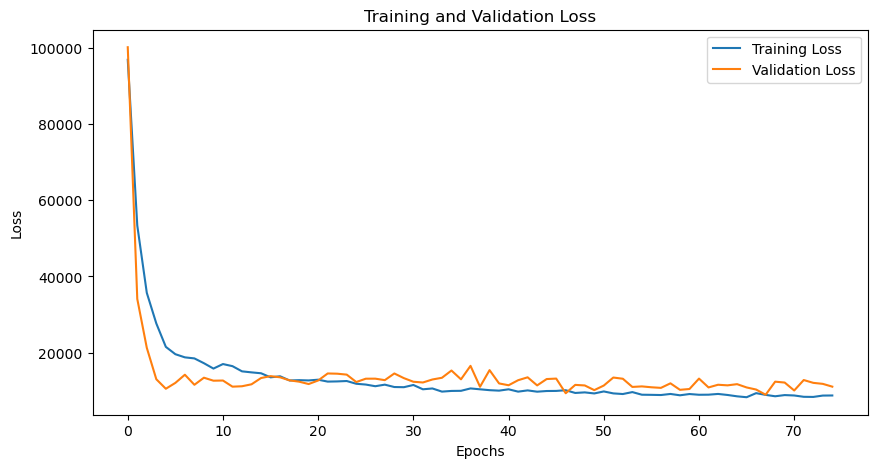

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step


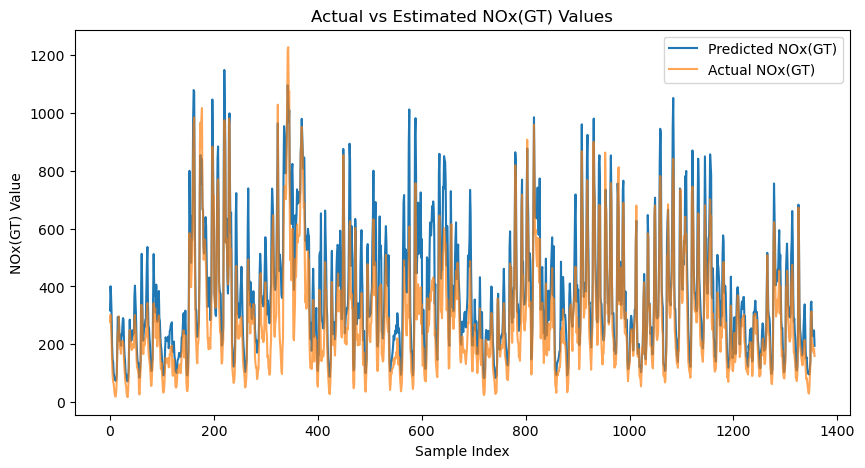

                 RMSE        MAE  Number of Samples
Test Data  105.073445  86.534838               1357


In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


# Plot the loss value
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot actual and predicted the value of NOx(GT)
predictions = model_regression.predict(X_test_for_regression)

plt.figure(figsize=(10, 5))
plt.plot(predictions, label='Predicted NOx(GT)')
plt.plot(y_test_for_regression.values, label='Actual NOx(GT)', alpha=0.7)
plt.title('Actual vs Estimated NOx(GT) Values')
plt.xlabel('Sample Index')
plt.ylabel('NOx(GT) Value')
plt.legend()
plt.show()

# Caculate RMSE and MAE
rmse = sqrt(mean_squared_error(y_test_for_regression, predictions))
mae = mean_absolute_error(y_test_for_regression, predictions)

# Create the table
results_df = pd.DataFrame({
    'RMSE': [rmse],
    'MAE': [mae],
    'Number of Samples': [len(y_test_for_regression)]
})
results_df.index = ['Test Data']

print(results_df)


In [42]:
# Save the model
model_regression.save('model_regression.keras')


# 3 Preprocess the new test set

In order to ensure the accuracy of the evaluation, we need to perform the same preprocessing steps on the test set. For the two tasks, we perform the following processing steps respectively.

In [44]:
# Note: the file path name needs to be modified according to the actual test set
test_set = pd.read_excel('Generalization Dataset.xlsx')
print("Test set shape is: ",test_set.shape)

# Replace all -200 values ​​with NaN
test_set.replace(-200, np.nan, inplace=True)

# Backup test set for different tasks
test_set_for_classification = test_set.copy()
test_set_for_regression = test_set.copy()

Test set shape is:  (872, 15)


## 3.1 Preprocessing process of classification task and prediction results

In [46]:
# Delete the rows where CO(GT) is NaN value
test_set_for_classification = test_set_for_classification.dropna(subset=['CO(GT)'])
print("The shape of test_set_for_classification: ",test_set_for_classification.shape)

# Select features: 13 in total
feature_columns = ['Date', 'Time', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'NOx(GT)']

# Extract feature set: X_for_classification
X_test = test_set_for_classification[feature_columns]
print("The shape of X_test after feature extraction: ",X_test.shape)
print(X_test.head(10))

# Save the labels (modify it according to the actual test set)
y_test = (test_set_for_classification['CO(GT)'] > 2.147).astype(int)
print(y_test.head(10))

The shape of test_set_for_classification:  (872, 15)
The shape of X_test after feature extraction:  (872, 13)
        Date      Time  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0 2004-03-11  15:00:00      1310.00   8.826223         932.50       1081.75   
1 2004-03-15  05:00:00      1074.50   3.865914         703.25       1155.75   
2 2004-03-15  06:00:00      1156.75   6.385320         829.50       1029.50   
3 2004-03-15  07:00:00      1314.00   9.685047         965.75        896.75   
4 2004-03-15  08:00:00      1796.75  25.870458        1451.00        652.00   
5 2004-03-15  09:00:00      1961.25  36.692063        1701.00        536.75   
6 2004-03-15  10:00:00      1770.50  26.636025        1470.00        621.50   
7 2004-03-15  11:00:00      1563.50  20.110923        1299.50        709.75   
8 2004-03-15  12:00:00      1430.00  14.096486        1119.75        830.50   
9 2004-03-15  13:00:00      1417.25  14.925719        1146.25        829.50   

   NO2(GT)  PT08.S4(

In [47]:
# Filling missing values
for column in X_test.columns:
    # Get the NaN index of the current column
    nan_indices = X_test[X_test[column].isna()].index

    if len(nan_indices) == 0:
        continue # If there are no NaN values, skip the current column

    # Find consecutive NaN indices
    groups = []
    group = [nan_indices[0]]

    for i in range(1, len(nan_indices)):
        if nan_indices[i] == nan_indices[i - 1] + 1:
            group.append(nan_indices[i])
        else:
            groups.append(group)
            group = [nan_indices[i]]

    # Add the last group
    groups.append(group)

    # Apply different fill strategies based on the size of the group
    for group in groups:
        if len(group) <= 5:
            # Fill less than or equal to 5 consecutive NaNs with linear interpolation
            X_test.loc[:, column] = X_test[column].interpolate(method='linear', limit_direction='both', limit_area='inside')
        else:
            # Use polynomial interpolation to fill more than 5 consecutive NaNs
            X_test.loc[group[0]:group[-1], column] = X_test[column].interpolate(method='polynomial', order=3, limit_direction='both')


# Format date columns, removing the time portion
X_test.loc[:, 'Date'] = pd.to_datetime(X_test['Date']).dt.strftime('%Y/%m/%d')

# Convert a date to the number of days since 3/10/2004
X_test.loc[:, 'Date'] = (pd.to_datetime(X_test['Date']) - pd.Timestamp('2004-03-10')).dt.days

# Convert time to integer
# X_test['Time'] = X_test['Time'].apply(lambda x: x.hour)
X_test.loc[:, 'Time'] = X_test['Time'].apply(lambda x: x.hour)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Train the normalizer and transform the data
X_normalized = scaler.fit_transform(X_test)

# Convert the normalized X_test back to DataFrame
X_test_normalized = pd.DataFrame(X_normalized, columns=X_test.columns)

print("The first 10 rows before adding PT08.S1(CO) column weights:")
print(X_test_normalized.head(10))

# Increase the weight of PT08.S1(CO)
X_test_normalized['PT08.S1(CO)'] *= 2

print("The first 10 rows after adding PT08.S1(CO) column weights:")
print(X_test_normalized.head(10))

The first 10 rows before adding PT08.S1(CO) column weights:
       Date      Time  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0  0.000000  0.652174     0.428879  0.187023       0.333817      0.425942   
1  0.010283  0.217391     0.244571  0.072189       0.167543      0.467856   
2  0.010283  0.260870     0.308941  0.130515       0.259112      0.396347   
3  0.010283  0.304348     0.432009  0.206905       0.357933      0.321155   
4  0.010283  0.347826     0.809822  0.581607       0.709882      0.182526   
5  0.010283  0.391304     0.938564  0.832133       0.891206      0.117247   
6  0.010283  0.434783     0.789278  0.599330       0.723663      0.165251   
7  0.010283  0.478261     0.627275  0.448270       0.600000      0.215236   
8  0.010283  0.521739     0.522794  0.309033       0.469628      0.283631   
9  0.010283  0.565217     0.512815  0.328230       0.488849      0.283064   

    NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH   NOx(GT)  
0  0.396591

In [48]:
from tensorflow.keras.models import load_model

# loss function
def weighted_binary_crossentropy(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    # Set weights
    weights = (y_true * 1) + ((1 - y_true) * 1.5)  # Increase the penalty for false positives
    bce = tf.keras.backend.binary_crossentropy(y_true, y_pred)
    weighted_bce = weights * bce
    return tf.keras.backend.mean(weighted_bce)


# load the model for classification
model_classification = load_model('model_classification.keras', custom_objects={'weighted_binary_crossentropy': weighted_binary_crossentropy})

# Use the model to make predictions
predictions = model_classification.predict(X_test_normalized)

# Convert the probabilities to class labels with a threshold of 0.5
predicted_labels = (predictions > 0.5).astype(int)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step


In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)

# Calculate  precision
precision = precision_score(y_test, predicted_labels)
print("Precision:", precision)

Accuracy: 0.9323394495412844
Precision: 0.9348441926345609


## 3.2 Preprocessing process of regression task and prediction results

In [51]:
# Delete the rows where NOx(GT) is NaN value
test_set_for_regression = test_set_for_regression.dropna(subset=['NOx(GT)'])
print("The shape of test_set_for_regression: ",test_set_for_regression.shape)

# Select features: 13 in total
feature_columns = ['Date', 'Time', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'CO(GT)']


# Extract feature set:X_for_regression
X_test_regression = test_set_for_regression[feature_columns]
print(X_test_regression.head(10))
print("The shape of test_set_for_regression after feature extraction：",X_test_regression.shape)


# Save the labels (modify it according to the actual test set)
y_test_regression = test_set_for_regression['NOx(GT)']
print(y_test_regression.head(10))


The shape of test_set_for_regression:  (872, 15)
        Date      Time  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0 2004-03-11  15:00:00      1310.00   8.826223         932.50       1081.75   
1 2004-03-15  05:00:00      1074.50   3.865914         703.25       1155.75   
2 2004-03-15  06:00:00      1156.75   6.385320         829.50       1029.50   
3 2004-03-15  07:00:00      1314.00   9.685047         965.75        896.75   
4 2004-03-15  08:00:00      1796.75  25.870458        1451.00        652.00   
5 2004-03-15  09:00:00      1961.25  36.692063        1701.00        536.75   
6 2004-03-15  10:00:00      1770.50  26.636025        1470.00        621.50   
7 2004-03-15  11:00:00      1563.50  20.110923        1299.50        709.75   
8 2004-03-15  12:00:00      1430.00  14.096486        1119.75        830.50   
9 2004-03-15  13:00:00      1417.25  14.925719        1146.25        829.50   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T         RH        AH  CO(GT)  
0   

In [52]:
# Filling missing values
for column in X_test_regression.columns:
    # Get the NaN index of the current column
    nan_indices = X_test_regression[X_test_regression[column].isna()].index

    if len(nan_indices) == 0:
        continue # If there are no NaN values, skip the current column

    # Find consecutive NaN indices
    groups = []
    group = [nan_indices[0]]

    for i in range(1, len(nan_indices)):
        if nan_indices[i] == nan_indices[i - 1] + 1:
            group.append(nan_indices[i])
        else:
            groups.append(group)
            group = [nan_indices[i]]

    # Add the last group
    groups.append(group)

    # Apply different fill strategies based on the size of the group
    for group in groups:
        if len(group) <= 5:
            # Fill less than or equal to 5 consecutive NaNs with linear interpolation
            X_test_regression.loc[:, column] = X_test_regression[column].interpolate(method='linear', limit_direction='both', limit_area='inside')

        else:
            # Use polynomial interpolation to fill more than 5 consecutive NaNs
            X_test_regression.loc[group[0]:group[-1], column] = X_test_regression[column].interpolate(method='polynomial', order=3, limit_direction='both')


# Format date columns, removing the time portion
X_test_regression.loc[:, 'Date'] = pd.to_datetime(X_test_regression['Date']).dt.strftime('%Y/%m/%d')

# Convert a date to the number of days since 3/10/2004
X_test_regression.loc[:, 'Date'] = (pd.to_datetime(X_test_regression['Date']) - pd.Timestamp('2004-03-10')).dt.days

# Convert time to integer
X_test_regression.loc[:, 'Time'] = X_test_regression['Time'].apply(lambda x: x.hour)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Train the normalizer and transform the data
X_normalized = scaler.fit_transform(X_test_regression)

# Convert the normalized X_test back to DataFrame
X_test_regression_normalized = pd.DataFrame(X_normalized, columns=X_test_regression.columns)


print("The first 10 rows before adding PT08.S3(NOx) column weights:")
print(X_test_regression_normalized.head(10))

# Increase the weight of T08.S3(NOx)
X_test_regression_normalized['PT08.S3(NOx)'] *= 2
# X_test_regression_normalized.loc[:, 'PT08.S3(NOx)'] *= 2

print("The first 10 rows after adding PT08.S3(NOx) column weights:")
print(X_test_regression_normalized.head(10))

The first 10 rows before adding PT08.S3(NOx) column weights:
       Date      Time  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0  0.000000  0.652174     0.428879  0.187023       0.333817      0.425942   
1  0.010283  0.217391     0.244571  0.072189       0.167543      0.467856   
2  0.010283  0.260870     0.308941  0.130515       0.259112      0.396347   
3  0.010283  0.304348     0.432009  0.206905       0.357933      0.321155   
4  0.010283  0.347826     0.809822  0.581607       0.709882      0.182526   
5  0.010283  0.391304     0.938564  0.832133       0.891206      0.117247   
6  0.010283  0.434783     0.789278  0.599330       0.723663      0.165251   
7  0.010283  0.478261     0.627275  0.448270       0.600000      0.215236   
8  0.010283  0.521739     0.522794  0.309033       0.469628      0.283631   
9  0.010283  0.565217     0.512815  0.328230       0.488849      0.283064   

    NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH    CO(GT)  
0  0.39659

In [53]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

# load the model for regression
model_regression = load_model('model_regression.keras')

# Use the model to make predictions
predictions_regression = model_regression.predict(X_test_regression_normalized)

# Caculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_regression, predictions_regression))
print("Root Mean Squared Error (RMSE):", rmse)

# Caculate MAE
mae = mean_absolute_error(y_test_regression, predictions_regression)
print("Mean Absolute Error (MAE):", mae)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
Root Mean Squared Error (RMSE): 98.90983679170002
Mean Absolute Error (MAE): 67.04327596349454
